<a href="https://colab.research.google.com/github/Gennifer2001/tesis/blob/main/T%C3%A9sisjeje2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Importar librerías necesarias***

In [ ]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from statistics import mean

In [ ]:
!pip install ete3
import ete3
from ete3 import Tree
import scipy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from scipy.cluster import hierarchy
import networkx,pylab
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from scipy.spatial.distance import pdist,squareform
import random
from IPython.display import display, Latex

### ***Cargar y limpiar base de datos***

In [ ]:
 url = 'https://raw.githubusercontent.com/Gennifer2001/tesis/main/psyco.csv'
df = pd.read_csv(url)
df['age'] = df['age'].replace("Dec-18", "12-18", regex=True)
df.head(8)

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN
1,12-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN
5,19-25,Male,Student in College,NaN,5,7,0.5,4,4,-1.0,...,-0.5,0.0,0.0,110,1100,Complete Physical Attendance,No,NaN,5,NaN
6,19-25,Male,Student in College,NaN,5,4,0.5,1,3,0.5,...,0.5,1.0,1.0,1100,1101,Work/study from home,Yes,NaN,5,NaN
7,19-25,Male,Student in College,NaN,7,9,0.5,3,2,0.0,...,-1.0,-0.5,0.0,1000,1000,Complete Physical Attendance,Yes,NaN,7,NaN


In [ ]:
df1 = df.drop(['age','gender', 'occupation','line_of_work','prefer','certaindays_hw','Unnamed: 19','travel+work','like_hw','dislike_hw','time_bp.1','Unnamed: 19'], axis=1)
nombres =['time_bp','time_dp','travel_time','easeof_online','home_env','prod_inc','sleep_bal','new_skill','fam_connect','relaxed','self_time']
df1

,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
0,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5
1,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0
2,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5
3,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5
4,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1170,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0
1171,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
1172,9,11,0.5,3,2,0.5,0.5,0.5,0.5,0.0,0.0
1173,11,12,1.5,2,2,0.0,0.0,0.0,-1.0,0.0,-0.5


Eliminaremos todos las variables no numericas y las que no nos aportan información

In [ ]:
# @title
df2 = df.drop(['gender', 'occupation','line_of_work','prefer','certaindays_hw','Unnamed: 19','travel+work','like_hw','dislike_hw','time_bp.1','Unnamed: 19'], axis=1)
imge = df2.head(10)
imge

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
0,19-25,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5
1,12-18,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0
2,19-25,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5
3,19-25,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5
4,19-25,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0
5,19-25,5,7,0.5,4,4,-1.0,-1.0,0.0,-0.5,0.0,0.0
6,19-25,5,4,0.5,1,3,0.5,0.5,1.0,0.5,1.0,1.0
7,19-25,7,9,0.5,3,2,0.0,-0.5,-0.5,-1.0,-0.5,0.0
8,19-25,5,9,0.5,1,2,1.0,1.0,1.0,1.0,1.0,1.0
9,19-25,7,7,1.5,2,2,0.0,0.0,0.0,-1.0,0.0,0.0


### ***Clusterización***

In [ ]:
seed = 42
np.random.seed(seed)
dfprueba = df2.sample(n=100)

Escalar los datos

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dfprueba.drop(["age"],axis=1))

In [ ]:
dfprueba.reset_index(drop=True,inplace=True)
ndf = pd.DataFrame(df_scaled, columns = [nombres])
ndf.loc[:,'age'] = dfprueba['age']
column_order = ['age','time_bp','time_dp','travel_time','easeof_online','home_env','prod_inc','sleep_bal','new_skill','fam_connect','relaxed','self_time']
ndf = ndf[column_order]

*Dendrograma*

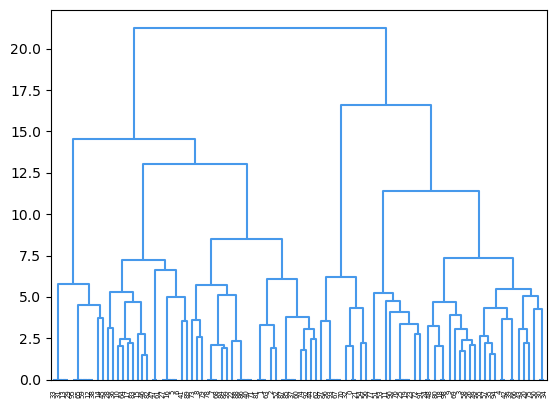

In [ ]:
dendo=linkage(df_scaled, 'ward')
color = 'blue'
def color_func(x):
    rgb_color = (71, 153, 235)  # Por ejemplo, rojo en formato RGB
    hex_color = '#%02x%02x%02x' % rgb_color
    return hex_color

dendograma = sch.dendrogram(dendo, color_threshold=float('inf'), link_color_func=color_func)

### ***Cálculo de Sn***

Convertir el dendrograma en formato newick

In [ ]:
def get_newick(node, parent_dist, leaf_names, newick='') -> str:
    """
    Convert sciply.cluster.hierarchy.to_tree()-output to Newick format.

    :param node: output of sciply.cluster.hierarchy.to_tree()
    :param parent_dist: output of sciply.cluster.hierarchy.to_tree().dist
    :param leaf_names: list of leaf names
    :param newick: leave empty, this variable is used in recursion.
    :returns: tree in Newick format
    """
    if node.is_leaf():
        return "%s:%.2f%s" % (leaf_names[node.id], parent_dist - node.dist, newick)
    else:
        if len(newick) > 0:
            newick = "):%.2f%s" % (parent_dist - node.dist, newick)
        else:
            newick = ");"
        newick = get_newick(node.get_left(), node.dist, leaf_names, newick=newick)
        newick = get_newick(node.get_right(), node.dist, leaf_names, newick=",%s" % (newick))
        newick = "(%s" % (newick)
        return newick

Convertir el dendrograma en cadena de texto

In [ ]:
leaf_names = range(0, 100)
tree1 = hierarchy.to_tree(dendo, False)
newick_tree1 = get_newick(tree1, tree1.dist, leaf_names)
tree = ete3.Tree(newick_tree1)

print(newick_tree1)

((((((((34:0.00,30:0.00):4.27,50:4.27):0.80,((75:2.22,20:2.22):0.83,43:3.06):2.01):0.39,(((66:0.00,39:0.00):3.68,(42:0.00,4:0.00):3.68):0.63,(((94:1.53,35:1.53):0.65,57:2.18):0.45,55:2.63):1.68):1.15):1.90,(((((49:2.08,26:2.08):0.29,(58:1.73,3:1.73):0.64):0.68,69:3.06):0.86,9:3.92):0.74,(((98:0.00,18:0.00):2.00,80:2.00):1.26,(48:0.00,24:0.00):3.26):1.40):2.70):4.02,(((((91:2.75,72:2.75):0.63,(((23:0.00,19:0.00):0.00,25:0.00):0.00,76:0.00):3.38):0.69,90:4.07):0.71,11:4.78):0.44,((53:0.00,51:0.00):0.00,77:0.00):5.22):6.16):5.24,(((56:2.20,54:2.20):2.13,((21:0.00,0:0.00):2.06,32:2.06):2.27):1.89,((((70:0.00,67:0.00):0.00,93:0.00):0.00,96:0.00):3.54,97:3.54):2.68):10.41):4.66,(((((((62:2.43,44:2.43):0.62,(92:1.79,74:1.79):1.27):0.71,(((60:0.00,37:0.00):0.00,85:0.00):0.00,87:0.00):3.77):2.32,((52:1.89,2:1.89):1.42,((63:0.00,1:0.00):0.00,81:0.00):3.31):2.78):2.42,((((((71:0.00,40:0.00):0.00,86:0.00):0.00,88:0.00):2.31,22:2.31):2.81,((99:1.88,84:1.88):0.19,((68:0.00,7:0.00):0.00,78:0.00):2.07

Hallar todos los subárboles del dendrograma

In [ ]:
from ete3 import Tree

def asignar_nombres(arbol):
    # Asignar nombres a los nodos si no tienen uno
    for i, nodo in enumerate(arbol.traverse()):
        if not nodo.name:
            nodo.name = f"Nodo_{i}"

def obtener_subarboles(arbol):
    subarboles = []

    for nodo in arbol.traverse():
        # Buscar nodos descendientes del nodo actual
        nodos_descendientes = arbol.search_nodes(name=nodo.name, order=1)

        # Construir un nuevo árbol con el nodo como raíz y sus descendientes
        subarbol = Tree()
        subarbol.add_child(nodo.copy())

        for descendiente in nodos_descendientes:
            subarbol.add_child(descendiente.copy())

        subarboles.append(subarbol)

    return subarboles

# Función para obtener la representación en formato de texto de un subárbol
def obtener_texto(subarbol):
    return subarbol.write(format=9)


asignar_nombres(tree)
todos_subarboles = obtener_subarboles(tree)

# Imprimir la representación en formato de texto de cada subárbol
#for i, subarbol in enumerate(todos_subarboles):
 #   print(f"Subárbol {i + 1} - Representación en formato de texto:")
  #  print(obtener_texto(subarbol))
   # print("\n")

Determinar los n-subárboles

In [ ]:
n_subarboles = []

for n in range(1, 101):
    n_subarbol = []  # Inicializar la lista para cada valor de n
    for subarbol in todos_subarboles:
        if len(subarbol) <= n:
            n_subarbol.append(subarbol)
    n_subarboles.append((n, n_subarbol))  # Agregar la lista de n-subarboles a la lista general

# Imprimir o procesar la lista de n-subarboles
#for n, subarboles in n_subarboles:
 #   print(f"Subárboles con tamaño menor o igual a {n}:")
  #  for subarbol in subarboles:
   #     print(obtener_texto(subarbol))
   # print("\n")

Determinar los n-subárboles maximales

In [ ]:
def es_contenido(subarbol1, subarbol2):
    """
    Verifica si subarbol1 está contenido en subarbol2.
    """
    nodos1 = set(nodo.name for nodo in subarbol1.traverse())
    nodos2 = set(nodo.name for nodo in subarbol2.traverse())

    return nodos1.issubset(nodos2)

def obtener_maximales(n_subarboles):
    """
    Obtiene los n-subarboles maximales a partir de la lista de n-subarboles.
    """
    maximales = []

    for n, subarboles in n_subarboles:
        subarboles_maximales = []

        for subarbol in subarboles:
            es_maximal = True

            # Comprobar si el subárbol está contenido en otro subárbol
            for otro_subarbol in subarboles:
                if subarbol != otro_subarbol and es_contenido(subarbol, otro_subarbol):
                   es_maximal = False
                   break

            if es_maximal:
               subarboles_maximales.append(subarbol)

        maximales.append((n, subarboles_maximales))

    return maximales

maximales = obtener_maximales(n_subarboles)

# Imprimir o procesar la lista de n-subarboles maximales
#for n, subarboles in maximales:
 #   print(f"Subárboles maximales con tamaño {n}:")
  #  for subarbol in subarboles:
   #     print(obtener_texto(subarbol))
    #print("\n")

Calcular Sn

In [ ]:
Sn = []

for n, subarboles in maximales:
    Sj = len(subarboles)  # Inicializar con la cantidad de n-subárboles maximales
    for subarbol in subarboles:
        Sj *= len(subarbol)
    Sn.append((n, Sj))

# Imprimir la lista Sn
for n, s in Sn:
    subindice = ''.join(chr(0x2080 + int(digito)) for digito in str(n))
    print(f"S{subindice}:", s)

S₁: 100
S₂: 1133871366144
S₃: 829406312792064
S₄: 6255800255250432
S₅: 5772902400000000
S₆: 2239488000000000
S₇: 938843136000000
S₈: 146313216000000
S₉: 88833024000000
S₁₀: 12541132800000
S₁₁: 662390784000
S₁₂: 662390784000
S₁₃: 77738918400
S₁₄: 20406466080
S₁₅: 20406466080
S₁₆: 20406466080
S₁₇: 4282838560
S₁₈: 4282838560
S₁₉: 4282838560
S₂₀: 4282838560
S₂₁: 4282838560
S₂₂: 4282838560
S₂₃: 4282838560
S₂₄: 4282838560
S₂₅: 608357750
S₂₆: 80223000
S₂₇: 80223000
S₂₈: 80223000
S₂₉: 80223000
S₃₀: 80223000
S₃₁: 80223000
S₃₂: 80223000
S₃₃: 80223000
S₃₄: 80223000
S₃₅: 80223000
S₃₆: 8751600
S₃₇: 8751600
S₃₈: 8751600
S₃₉: 8751600
S₄₀: 8751600
S₄₁: 8751600
S₄₂: 8751600
S₄₃: 681120
S₄₄: 681120
S₄₅: 681120
S₄₆: 65274
S₄₇: 65274
S₄₈: 65274
S₄₉: 65274
S₅₀: 65274
S₅₁: 65274
S₅₂: 65274
S₅₃: 65274
S₅₄: 4968
S₅₅: 4968
S₅₆: 4968
S₅₇: 4968
S₅₈: 4968
S₅₉: 4968
S₆₀: 4968
S₆₁: 4968
S₆₂: 4968
S₆₃: 4968
S₆₄: 4968
S₆₅: 4968
S₆₆: 4968
S₆₇: 4968
S₆₈: 4968
S₆₉: 4968
S₇₀: 4968
S₇₁: 4968
S₇₂: 4968
S₇₃: 4968
S₇₄: 4968


Encontrar el máximo y el n asociado

In [ ]:
maximo_valor = max(Sn, key=lambda x: x[1])
print(f"Valor máximo en Sn: {maximo_valor}")

k = maximo_valor[0]
print(f"El valor de n es {k}")

Valor máximo en Sn: (4, 6255800255250432)
El valor de n es 4


### ***Base topológica***

In [ ]:
n_subarboles_maximales = None

for n, subarboles in maximales:
    if n == k:
        n_subarboles_maximales = subarboles
        break

Agrupar las hojas de los 4-subarboles maximales en subconjuntos

In [ ]:
Base =[]

for subarbol in n_subarboles_maximales:
  y = []
  for node in subarbol.traverse():
    if node.is_leaf():
      elem = node.name
      y.append(elem)
  Base.append(y)
subindice_k = ''.join(chr(0x2080 + int(digito)) for digito in str(k))
print(f"El valor de n es {k}, y así, obtenemos la base topológica B{subindice_k}")
Base

El valor de n es 4, y así, obtenemos la base topológica B₄


[['33', '31', '29', '13'],
 ['77', '53', '51'],
 ['56', '54'],
 ['32', '21', '0'],
 ['96', '93', '70', '67'],
 ['97'],
 ['45', '14'],
 ['11'],
 ['73', '79', '8'],
 ['61', '47'],
 ['36', '28'],
 ['65', '59', '38', '12'],
 ['95'],
 ['50', '34', '30'],
 ['43', '75', '20'],
 ['66', '39', '42', '4'],
 ['55', '57', '94', '35'],
 ['9'],
 ['80', '98', '18'],
 ['48', '24'],
 ['90'],
 ['62', '44', '92', '74'],
 ['87', '85', '60', '37'],
 ['52', '2'],
 ['81', '63', '1'],
 ['89', '41'],
 ['27', '16', '6', '5'],
 ['15', '82', '46'],
 ['83', '17', '64', '10'],
 ['49', '26', '58', '3'],
 ['69'],
 ['91', '72'],
 ['76', '25', '23', '19'],
 ['88', '86', '71', '40'],
 ['22'],
 ['99', '84'],
 ['78', '68', '7']]

In [ ]:
A = ['4','9','18','42','43','46','79','84','98']
#A = ['12','38','59','65','95']

### ***Puntos de la base***

***Exterior***

In [ ]:
B = []

for i in Base:
    if not any(elem in A for elem in i):
        B.append(i)
print(B)

[['33', '31', '29', '13'], ['77', '53', '51'], ['56', '54'], ['32', '21', '0'], ['96', '93', '70', '67'], ['97'], ['45', '14'], ['11'], ['61', '47'], ['36', '28'], ['65', '59', '38', '12'], ['95'], ['50', '34', '30'], ['55', '57', '94', '35'], ['48', '24'], ['90'], ['62', '44', '92', '74'], ['87', '85', '60', '37'], ['52', '2'], ['81', '63', '1'], ['89', '41'], ['27', '16', '6', '5'], ['83', '17', '64', '10'], ['49', '26', '58', '3'], ['69'], ['91', '72'], ['76', '25', '23', '19'], ['88', '86', '71', '40'], ['22'], ['78', '68', '7']]


***Interior***

In [ ]:
B = []

for i in Base:
    if all(elem in A for elem in i):
        B.append(i)
print(B)


[['9']]


***Adherencia***

In [ ]:
lista_m = [str(i) for i in range(101)]
resultados = []

for m in lista_m:
    for sublista in Base:
        if m in sublista and any(elem in A for elem in sublista):
            resultados.append(m)
            break
print(resultados)

['4', '8', '9', '15', '18', '20', '39', '42', '43', '46', '66', '73', '75', '79', '80', '82', '84', '98', '99']


***Límite***

In [ ]:
resultados1 = []

for m in lista_m:
    for sublista in Base:
        if m in sublista and any(elem in A for elem in sublista if elem != m):
            resultados1.append(m)
            break

print(resultados1)

['4', '8', '15', '18', '20', '39', '42', '66', '73', '75', '80', '82', '98', '99']


### ***Análisis topológico***

In [ ]:
#Para poder convertir age en cadena de texto
ndf['age'] = ndf['age'].astype(str, errors='raise')

Tomar los diferentes rangos de edades como subconjuntos a estudiar

In [ ]:
categorias_unicas = df['age'].unique()
print(categorias_unicas)

['19-25' '12-18' '33-40' '60+' '26-32' '40-50' '50-60']


In [ ]:
edades1 = dfprueba[dfprueba['age']=='12-18']
#n = len(edades1)
edades1

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
4,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5
9,12-18,4,5,1.5,2,5,-1.0,-0.5,1.0,0.0,-1.0,0.5
18,12-18,5,4,0.5,3,3,0.0,-0.5,0.5,1.0,0.0,0.5
42,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5
43,12-18,9,7,0.5,3,2,-0.5,0.5,1.0,1.0,-0.5,0.0
46,12-18,9,12,0.5,3,2,0.0,0.5,0.0,0.5,0.0,-0.5
79,12-18,4,9,0.5,1,2,-1.0,-1.0,1.0,-0.5,0.5,0.5
84,12-18,7,5,0.5,2,1,0.0,0.5,0.5,1.0,0.5,0.5
98,12-18,5,4,0.5,3,3,0.0,-0.5,0.5,1.0,0.0,0.5


Conjunto Adherenca de A

In [ ]:
indices_a_seleccionar = [66,39,42,4,73,8,43,20,80,98,18,15,82,46,99,84,9]
AdherenciaA = dfprueba.loc[indices_a_seleccionar]

# Imprimir las filas seleccionadas
AdherenciaA

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
66,33-40,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0
39,33-40,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0
42,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5
4,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5
73,19-25,9,9,0.5,1,3,-0.5,-0.5,0.5,1.0,1.0,1.0
8,19-25,5,5,0.5,1,2,-0.5,-1.0,0.5,0.5,0.5,1.0
43,12-18,9,7,0.5,3,2,-0.5,0.5,1.0,1.0,-0.5,0.0
20,19-25,9,9,0.5,4,2,-0.5,-0.5,1.0,0.0,-0.5,0.5
80,19-25,5,5,0.5,3,3,0.0,0.5,0.5,1.0,0.5,0.5
98,12-18,5,4,0.5,3,3,0.0,-0.5,0.5,1.0,0.0,0.5


Frontera de A

In [ ]:
indices_a_seleccionar = [73,79,8,43,75,20,66,39,42,4,80,98,18,15,82,46,99,84]
FronteraA = dfprueba.loc[indices_a_seleccionar]

# Imprimir las filas seleccionadas
FronteraA

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
73,19-25,9,9,0.5,1,3,-0.5,-0.5,0.5,1.0,1.0,1.0
79,12-18,4,9,0.5,1,2,-1.0,-1.0,1.0,-0.5,0.5,0.5
8,19-25,5,5,0.5,1,2,-0.5,-1.0,0.5,0.5,0.5,1.0
43,12-18,9,7,0.5,3,2,-0.5,0.5,1.0,1.0,-0.5,0.0
75,50-60,7,5,0.5,3,2,-0.5,-0.5,0.5,-0.5,-0.5,0.5
20,19-25,9,9,0.5,4,2,-0.5,-0.5,1.0,0.0,-0.5,0.5
66,33-40,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0
39,33-40,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0
42,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5
4,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5


In [ ]:
indices_a_seleccionar = [73,8,66,34,42,4,75,20,80,98,18,15,82,99]
LimiteA = dfprueba.loc[indices_a_seleccionar]

# Imprimir las filas seleccionadas
LimiteA

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
73,19-25,9,9,0.5,1,3,-0.5,-0.5,0.5,1.0,1.0,1.0
8,19-25,5,5,0.5,1,2,-0.5,-1.0,0.5,0.5,0.5,1.0
66,33-40,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0
34,33-40,9,9,0.5,5,5,-1.0,0.0,0.5,0.5,-0.5,0.0
42,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5
4,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5
75,50-60,7,5,0.5,3,2,-0.5,-0.5,0.5,-0.5,-0.5,0.5
20,19-25,9,9,0.5,4,2,-0.5,-0.5,1.0,0.0,-0.5,0.5
80,19-25,5,5,0.5,3,3,0.0,0.5,0.5,1.0,0.5,0.5
98,12-18,5,4,0.5,3,3,0.0,-0.5,0.5,1.0,0.0,0.5


In [ ]:
indices_a_seleccionar = [1,2,3,26,49,52,58,63,81,33,31,29,13,77,53,51,56,54,32,21,0,96,93,70,67,97,45,14,11,61,47,36,28,65,59,38,12,95,50,34,30,55,57,94,35,48,24,90,62,44,92,74,87,85,60,37,52,89,41,27,16,6,5,83,17,64,10,69,91,72,76,25,23,19,88,86,71,40,22,78,68,7]
ExteriorA = dfprueba.loc[indices_a_seleccionar]

# Imprimir las filas seleccionadas
ExteriorA


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
1,26-32,9,7,0.5,1,1,1.0,1.0,1.0,1.0,1.0,1.0
2,19-25,7,4,1.5,1,1,1.0,1.0,1.0,1.0,1.0,1.0
3,19-25,7,4,0.5,3,4,-0.5,-1.0,0.5,0.5,-0.5,0.5
26,19-25,5,4,0.5,2,3,0.0,-0.5,0.0,0.0,0.0,0.0
49,19-25,7,4,0.5,2,3,0.0,-1.0,0.5,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
40,40-50,7,7,0.5,1,3,0.5,0.5,0.5,0.5,0.5,0.5
22,40-50,7,7,0.5,2,3,1.0,0.0,0.0,0.5,0.5,0.0
78,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0
68,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0


In [ ]:
resumen_estadistico1 = edades1.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_estadistico1)

               count      mean       std  min  25%  50%  75%   max
time_bp          9.0  6.333333  1.936492  4.0  5.0  7.0  7.0   9.0
time_dp          9.0  6.000000  2.828427  4.0  4.0  5.0  7.0  12.0
travel_time      9.0  0.611111  0.333333  0.5  0.5  0.5  0.5   1.5
easeof_online    9.0  2.777778  0.971825  1.0  2.0  3.0  3.0   4.0
home_env         9.0  3.111111  1.536591  1.0  2.0  3.0  5.0   5.0
prod_inc         9.0 -0.388889  0.416667 -1.0 -0.5 -0.5  0.0   0.0
sleep_bal        9.0 -0.111111  0.546453 -1.0 -0.5  0.0  0.5   0.5
new_skill        9.0  0.500000  0.433013  0.0  0.0  0.5  1.0   1.0
fam_connect      9.0  0.555556  0.527046 -0.5  0.5  0.5  1.0   1.0
relaxed          9.0 -0.055556  0.463980 -1.0  0.0  0.0  0.0   0.5
self_time        9.0  0.333333  0.353553 -0.5  0.5  0.5  0.5   0.5


In [ ]:
resumen_limite = LimiteA.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_limite)

               count      mean       std  min    25%   50%    75%   max
time_bp         14.0  7.000000  1.754116  5.0  5.000  7.00  9.000   9.0
time_dp         14.0  6.500000  2.738613  4.0  4.000  5.00  9.000  11.0
travel_time     14.0  0.642857  0.363137  0.5  0.500  0.50  0.500   1.5
easeof_online   14.0  3.071429  1.141139  1.0  3.000  3.00  4.000   5.0
home_env        14.0  3.000000  1.300887  1.0  2.000  3.00  3.750   5.0
prod_inc        14.0 -0.250000  0.427425 -1.0 -0.500 -0.50  0.000   0.5
sleep_bal       14.0 -0.142857  0.534522 -1.0 -0.500 -0.25  0.000   1.0
new_skill       14.0  0.357143  0.363137 -0.5  0.125  0.50  0.500   1.0
fam_connect     14.0  0.571429  0.432219 -0.5  0.500  0.50  1.000   1.0
relaxed         14.0  0.035714  0.458437 -0.5 -0.375  0.00  0.375   1.0
self_time       14.0  0.464286  0.307864  0.0  0.500  0.50  0.500   1.0


In [ ]:
resumen_frontera = FronteraA.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_frontera)

               count      mean       std  min    25%  50%   75%   max
time_bp         18.0  6.833333  1.823055  4.0  5.000  7.0  9.00   9.0
time_dp         18.0  6.777778  2.755861  4.0  4.250  6.0  9.00  12.0
travel_time     18.0  0.666667  0.383482  0.5  0.500  0.5  0.50   1.5
easeof_online   18.0  2.833333  1.043185  1.0  2.250  3.0  3.75   4.0
home_env        18.0  2.666667  1.188177  1.0  2.000  2.0  3.00   5.0
prod_inc        18.0 -0.250000  0.392953 -1.0 -0.500 -0.5  0.00   0.5
sleep_bal       18.0 -0.083333  0.575224 -1.0 -0.500  0.0  0.50   1.0
new_skill       18.0  0.361111  0.447396 -0.5  0.000  0.5  0.50   1.0
fam_connect     18.0  0.555556  0.481691 -0.5  0.500  0.5  1.00   1.0
relaxed         18.0  0.055556  0.450127 -0.5 -0.375  0.0  0.50   1.0
self_time       18.0  0.388889  0.366042 -0.5  0.125  0.5  0.50   1.0


In [ ]:
resumen_adherencia = AdherenciaA.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_adherencia)

               count      mean       std  min  25%  50%  75%   max
time_bp         17.0  6.823529  1.878673  4.0  5.0  7.0  9.0   9.0
time_dp         17.0  6.647059  2.782561  4.0  4.0  5.0  9.0  12.0
travel_time     17.0  0.735294  0.437237  0.5  0.5  0.5  0.5   1.5
easeof_online   17.0  2.882353  0.992620  1.0  2.0  3.0  4.0   4.0
home_env        17.0  2.882353  1.317306  1.0  2.0  3.0  4.0   5.0
prod_inc        17.0 -0.235294  0.399908 -1.0 -0.5 -0.5  0.0   0.5
sleep_bal       17.0 -0.029412  0.544018 -1.0 -0.5  0.0  0.5   1.0
new_skill       17.0  0.352941  0.459779 -0.5  0.0  0.5  0.5   1.0
fam_connect     17.0  0.647059  0.342997  0.0  0.5  0.5  1.0   1.0
relaxed         17.0  0.000000  0.500000 -1.0 -0.5  0.0  0.5   1.0
self_time       17.0  0.382353  0.376223 -0.5  0.0  0.5  0.5   1.0


In [ ]:
resumen_exterior = ExteriorA.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_exterior)

               count      mean       std  min    25%   50%     75%   max
time_bp         82.0  7.707317  2.033593  5.0  7.000  7.00   9.000  12.0
time_dp         82.0  8.207317  2.725000  4.0  5.000  9.00  11.000  12.0
travel_time     82.0  1.060976  0.763319  0.5  0.500  0.50   1.500   3.0
easeof_online   82.0  2.682927  1.246011  1.0  2.000  3.00   4.000   5.0
home_env        82.0  2.792683  1.214499  1.0  2.000  3.00   4.000   5.0
prod_inc        82.0  0.006098  0.664319 -1.0 -0.500  0.00   0.500   1.0
sleep_bal       82.0 -0.109756  0.693997 -1.0 -0.875  0.00   0.500   1.0
new_skill       82.0  0.189024  0.655651 -1.0 -0.500  0.25   0.875   1.0
fam_connect     82.0  0.274390  0.720735 -1.0  0.000  0.50   1.000   1.0
relaxed         82.0  0.091463  0.703291 -1.0 -0.500  0.00   0.500   1.0
self_time       82.0  0.042683  0.589000 -1.0 -0.500  0.00   0.500   1.0


In [ ]:
edades2 = dfprueba[dfprueba['age']=='19-25']
#n = len(edades1)
edades2

In [ ]:
resumen_estadistico2 = edades2.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_estadistico2)

In [ ]:
edades3 = dfprueba[dfprueba['age']=='26-32']
#n = len(edades1)
edades3

In [ ]:
resumen_estadistico3 = edades3.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_estadistico3)

In [ ]:
edades4 = dfprueba[dfprueba['age']=='33-40']
#n = len(edades1)
edades4

In [ ]:
resumen_estadistico4 = edades4.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_estadistico4)

In [ ]:
edades5 = dfprueba[dfprueba['age']=='40-50']
#n = len(edades1)
edades5

In [ ]:
resumen_estadistico5 = edades5.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_estadistico5)

In [ ]:
edades6 = dfprueba[dfprueba['age']=='50-60']
#n = len(edades1)
edades6

In [ ]:
resumen_estadistico6 = edades6.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_estadistico6)

In [ ]:
edades7 = dfprueba[dfprueba['age']=='60+']
#n = len(edades1)
edades7

In [ ]:
resumen_estadistico7 = edades7.iloc[:, 1:].describe().transpose()

# Imprimir los resultados
print(resumen_estadistico7)

In [ ]:
mean(resumen_estadistico1['std'])

In [ ]:
mean(resumen_estadistico2['std'])

In [ ]:
mean(resumen_estadistico3['std'])

In [ ]:
mean(resumen_estadistico4['std'])

In [ ]:
mean(resumen_estadistico5['std'])

In [ ]:
mean(resumen_estadistico6['std'])

In [ ]:
mean(resumen_estadistico7['std'])